#1. Problema de Negócio

Uma instituição financeira global decidiu expandir sua atuação ao enxergar uma grande oportunidade no crédito no Brasil. Impulsionada pelo cenário atual de Open Banking, ela passou a operar no país por meio da criação da fintech Crédito Fácil.

Com a evolução rápida da empresa — e considerando que o mercado brasileiro de crédito já é consolidado, com indicadores de inadimplência relativamente bem monitorados — a fintech atraiu a atenção de muitos investidores. Os aportes de capital se multiplicaram e, em pouco tempo, a Crédito Fácil alcançou o status de unicórnio, termo usado para empresas avaliadas em bilhões de reais.

Seguindo uma cultura data-driven, a empresa está recrutando profissionais de Ciência de Dados para desenvolver um Sistema Online de Aprovação de Empréstimos, baseado em Machine Learning e Python. O seu desafio é exatamente esse: construir a máquina preditiva e documentar, de forma detalhada, cada etapa do processo — desde a preparação dos dados até a entrega da solução.

Base de dados: para treinar e avaliar o modelo, foram fornecidos registros históricos de crédito dos clientes disponíveis no arquivo clientes.csv.

# 2. Análise Exploratória dos Dados


In [1]:
## Pacotes
import pandas as pd     #Biblioteca de Funções de Manipulação de Dados
import seaborn as sns   #Biblioteca de Funções de Visualização Gráfica
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importação dos Dados
clientes = pd.read_csv('/content/clientes.csv')

In [3]:
#Verifica as Dimensões do Arquivo
clientes.shape

(614, 13)

In [4]:
#Verificando os primeiros registros
clientes.head()

,cod_cliente,sexo,estado_civil,dependentes,educacao,empregado,renda,renda_conjuge,emprestimo,prestacao_mensal,historico_credito,imovel,aprovacao_emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [5]:
#Verificando as informações dos campos da tabela de dados
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cod_cliente           614 non-null    object 
 1   sexo                  601 non-null    object 
 2   estado_civil          611 non-null    object 
 3   dependentes           599 non-null    object 
 4   educacao              614 non-null    object 
 5   empregado             582 non-null    object 
 6   renda                 614 non-null    int64  
 7   renda_conjuge         614 non-null    object 
 8   emprestimo            592 non-null    float64
 9   prestacao_mensal      600 non-null    float64
 10  historico_credito     564 non-null    float64
 11  imovel                614 non-null    object 
 12  aprovacao_emprestimo  614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [6]:
#Verifica se há valores Nulos/ausentes
clientes.isnull().sum()

,0
cod_cliente,0
sexo,13
estado_civil,3
dependentes,15
educacao,0
empregado,32
renda,0
renda_conjuge,0
emprestimo,22
prestacao_mensal,14


In [7]:
#verifica se há valores duplicados
clientes.duplicated().sum()

np.int64(0)

### Conhecendo a Distribuição dos Dados de Cada Variável/Campo

In [8]:
#Estatísticas descritivas das variáveis numéricas
clientes.describe()

,renda,emprestimo,prestacao_mensal,historico_credito
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [9]:
# Tabela de Frequência da Variável "aprovacao_emprestimo" - Nossa Classe ou Label ou Target ou Y ou Variável a ser Predita (o que a gente quer descobrir)
clientes.aprovacao_emprestimo.value_counts()

,count
aprovacao_emprestimo,
Y,422
N,192


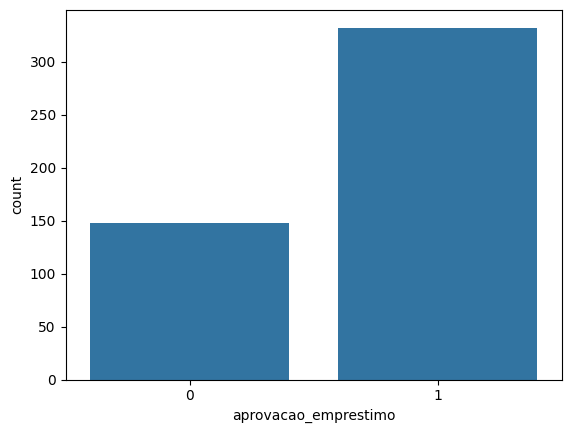

In [45]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes, x="aprovacao_emprestimo")
plt.show()

<Axes: xlabel='historico_credito', ylabel='count'>

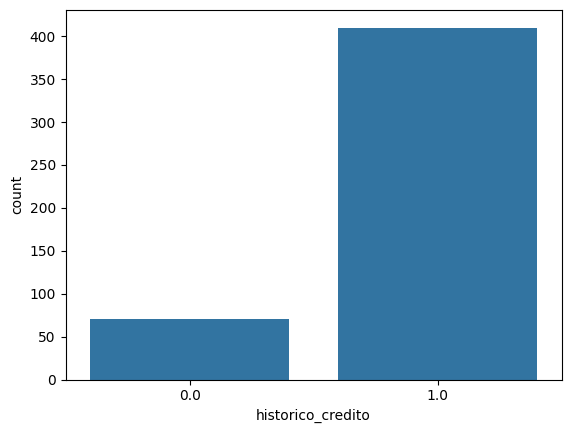

In [49]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes, x="historico_credito")

<Axes: xlabel='educacao', ylabel='count'>

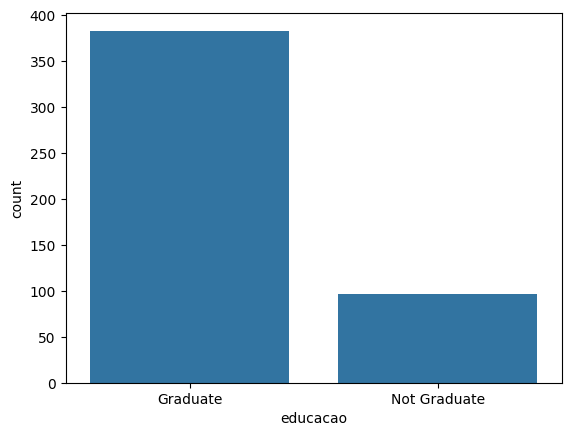

In [52]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="educacao")

<Axes: xlabel='sexo', ylabel='count'>

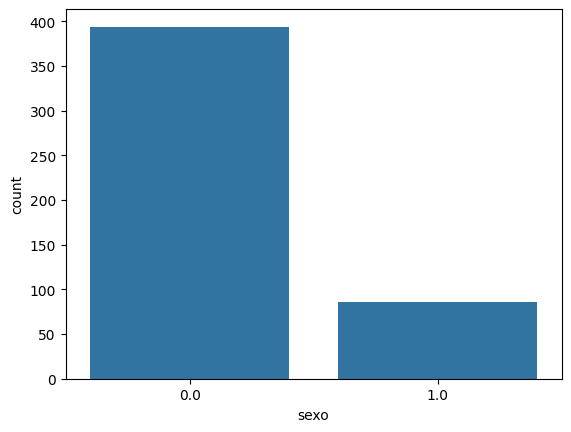

In [53]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="sexo")

<Axes: xlabel='imovel', ylabel='count'>

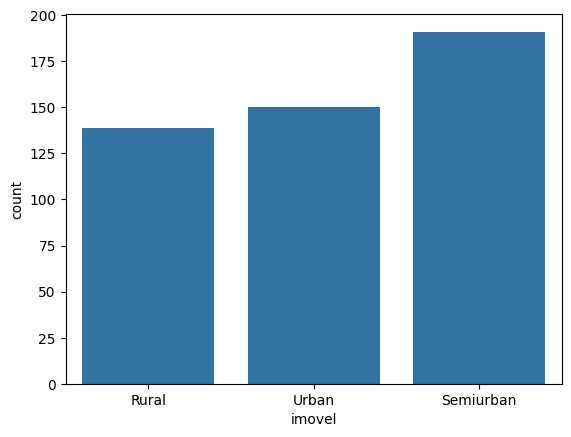

In [54]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="imovel")

<Axes: xlabel='educacao', ylabel='count'>

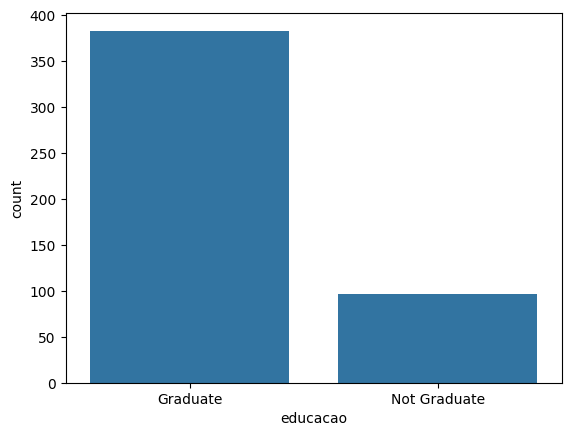

In [55]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="educacao")

<Axes: xlabel='dependentes', ylabel='count'>

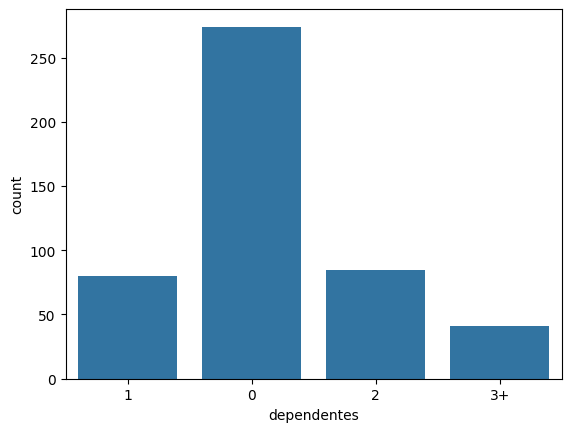

In [56]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="dependentes")

<Axes: xlabel='estado_civil', ylabel='count'>

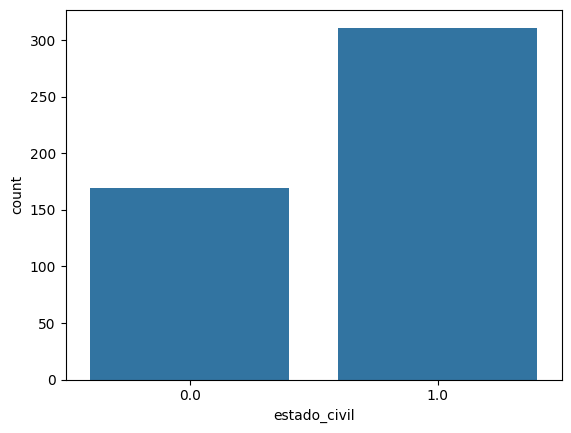

In [57]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="estado_civil")

<Axes: xlabel='empregado', ylabel='count'>

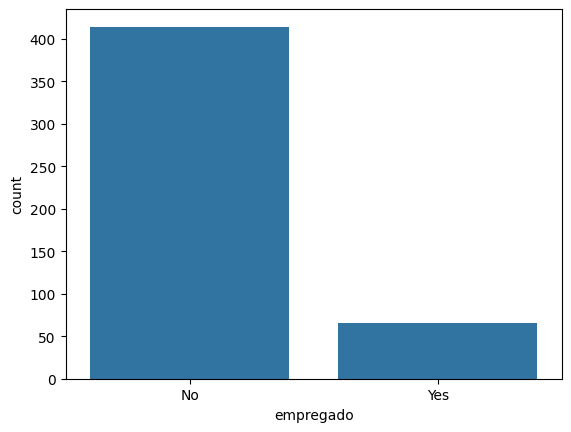

In [58]:
#Criando Gráfico de Barras para variáveis Categóricas
sns.countplot(data=clientes,x="empregado")

<Axes: xlabel='renda', ylabel='Count'>

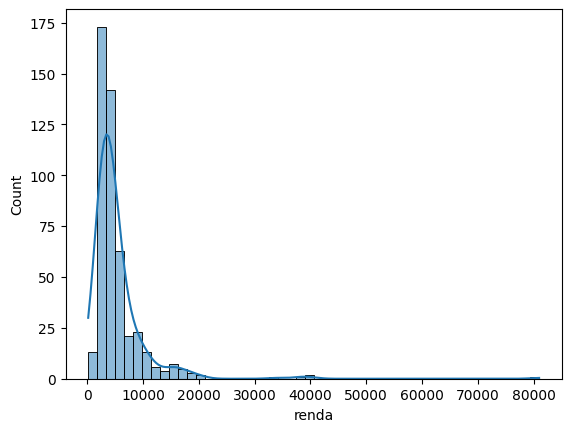

In [65]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(data=clientes, x='renda', bins=50, kde=True)

<Axes: >

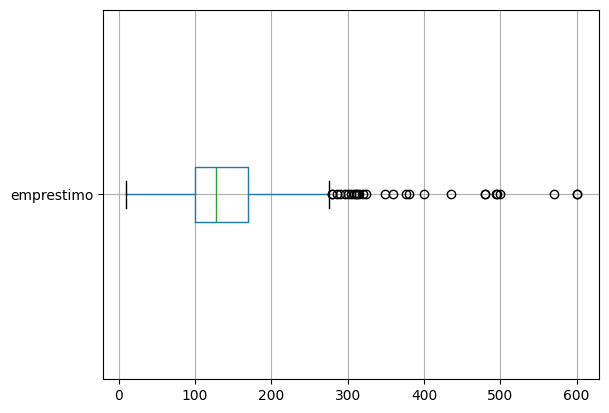

In [66]:
#Distribuição dos dados BOXPLOT
clientes.boxplot(column='emprestimo', vert=False )

<Axes: xlabel='emprestimo', ylabel='Count'>

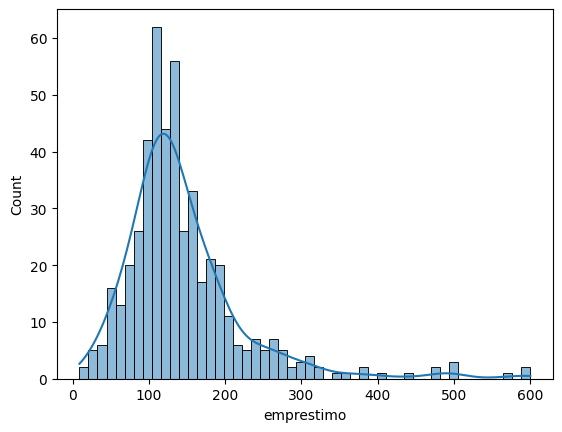

In [67]:
#Criando Gráfico de Distribuição para variáveis contínuas
sns.histplot(clientes['emprestimo'], bins=50, kde=True)

<Axes: xlabel='emprestimo', ylabel='renda'>

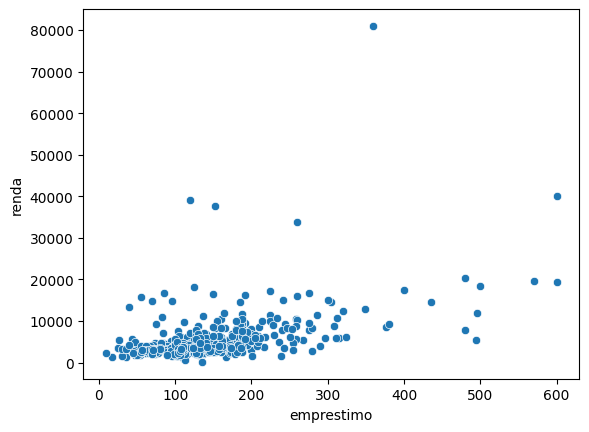

In [68]:
# Correlação entre as Variáveis
sns.scatterplot(data=clientes, x="emprestimo", y="renda", ) #hue='aprovacao_emprestimo')

# 3. Pré-Processamento dos Dados


In [25]:
#Substituindo caracteres por números
clientes['sexo']= clientes['sexo'].map({'Male':0, 'Female':1})
clientes['estado_civil']= clientes['estado_civil'].map({'No':0, 'Yes':1})
clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [26]:
# Eliminando valores Nulos
clientes= clientes.dropna()
clientes.isnull().sum()

,0
cod_cliente,0
sexo,0
estado_civil,0
dependentes,0
educacao,0
empregado,0
renda,0
renda_conjuge,0
emprestimo,0
prestacao_mensal,0


In [27]:
clientes.describe()

,sexo,estado_civil,renda,emprestimo,prestacao_mensal,historico_credito,aprovacao_emprestimo
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,5364.231250,144.735417,342.050000,0.854167,0.691667
std,0.383892,0.478118,5668.251251,80.508164,65.212401,0.353307,0.462287
min,0.000000,0.000000,150.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,0.000000,2898.750000,100.000000,360.000000,1.000000,0.000000
50%,0.000000,1.000000,3859.000000,128.000000,360.000000,1.000000,1.000000
75%,0.000000,1.000000,5852.500000,170.000000,360.000000,1.000000,1.000000
max,1.000000,1.000000,81000.000000,600.000000,480.000000,1.000000,1.000000


In [29]:
clientes.to_csv("clientes_tratado.csv", index=False, encoding="utf-8-sig")
print("✅ Salvo em: clientes_tratado.csv")

✅ Salvo em: clientes_tratado.csv


In [35]:
import pandas as pd

clientes_tratado = pd.read_csv("clientes_tratado.csv")
clientes_tratado.shape



(480, 13)